In [14]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import re
import os
import math

import seaborn as sns

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
file = 'regression_classification_categories_summary.csv'

dirname = os.getcwd()
classification_file = os.path.abspath(os.path.join(dirname, file))
df = pd.read_csv(classification_file)

In [16]:
df.columns

Index(['Unnamed: 0', 'ProtocolName', 'LabelName', 'GroupValues', 'Size',
       'Estimator', 'ROC_AUC', 'ClassificationPointType', 'Direction',
       'Threshold', 'Accuracy', 'Precision', 'Recall', 'f1', 'Percent', 'tp',
       'fp', 'tn', 'fn', 'correlation', 'spearman', 'regressionFile',
       'protocolFile', 'cost', 'Category'],
      dtype='object')

In [17]:
df.shape

(344, 25)

In [18]:
df.Category.value_counts()

Classification    243
Both               59
Bad                22
Regression         20
Name: Category, dtype: int64

In [19]:
df[df.Category == 'Bad'].ROC_AUC.describe()

count    22.000000
mean      0.567773
std       0.022367
min       0.527083
25%       0.550700
50%       0.570512
75%       0.586311
max       0.599837
Name: ROC_AUC, dtype: float64

In [20]:
df[df.Category != 'Bad'].ROC_AUC.describe()

count    322.000000
mean       0.913199
std        0.076517
min        0.609775
25%        0.890067
50%        0.937378
75%        0.960330
max        0.999739
Name: ROC_AUC, dtype: float64

In [21]:
df[(df.Category != 'Bad') & (df.ROC_AUC < 0.6)]

,Unnamed: 0,ProtocolName,LabelName,GroupValues,Size,Estimator,ROC_AUC,ClassificationPointType,Direction,Threshold,...,tp,fp,tn,fn,correlation,spearman,regressionFile,protocolFile,cost,Category


In [22]:
df[(df.Category == 'Bad') & (df.ROC_AUC > 0.6)]

,Unnamed: 0,ProtocolName,LabelName,GroupValues,Size,Estimator,ROC_AUC,ClassificationPointType,Direction,Threshold,...,tp,fp,tn,fn,correlation,spearman,regressionFile,protocolFile,cost,Category


In [23]:
df = df[df.Category != 'Bad']

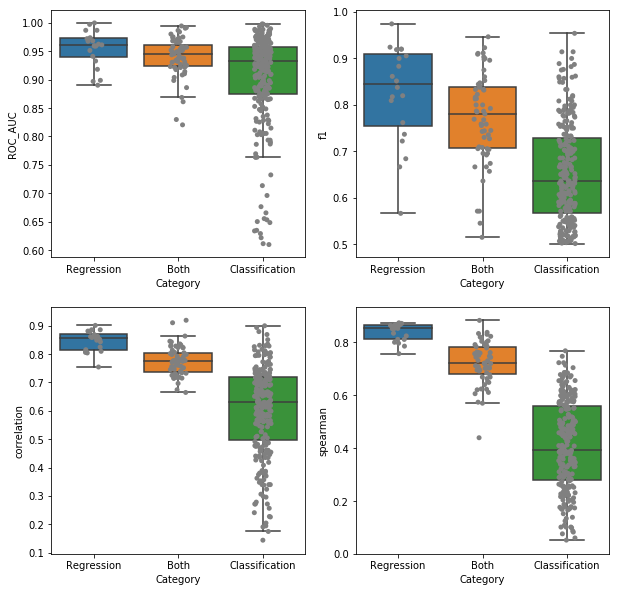

In [24]:
def plot_column(c, ax):
    order=['Regression', 'Both', 'Classification']
    sns.boxplot(x='Category', y=c, data=df, orient='v', ax=ax, showfliers=False, order=order)
    sns.stripplot(x='Category', y=c, data=df, orient='v', jitter=True, color='gray', ax=ax, order=order)
    
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
plot_column('ROC_AUC', axes[0][0])
plot_column('f1', axes[0][1])
plot_column('correlation', axes[1][0])
plot_column('spearman', axes[1][1])


In [25]:
def grouped_category(row):
    category = row['Category']
    if category in ['Both', 'Regression']:
        return 'Regression'
    elif category == 'Classification':
        return 'Classification'
    else:
        raise ValueError()

df['binary_category'] = df.apply(grouped_category, axis=1)

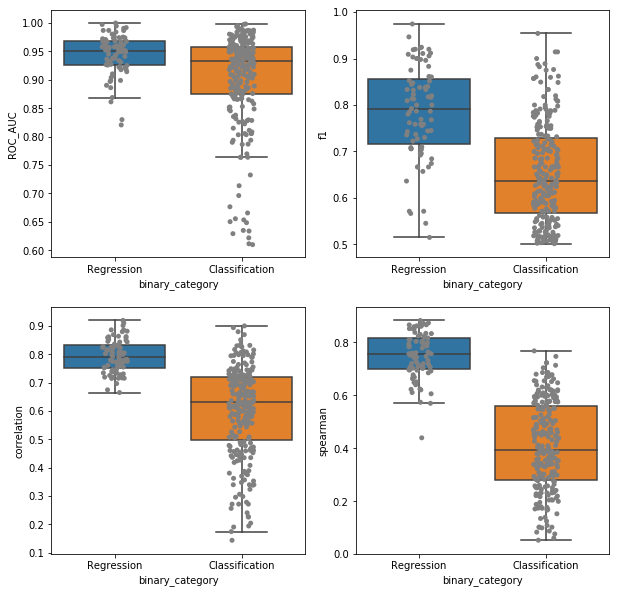

In [26]:
def plot_column(c, ax):
    order=['Regression', 'Classification']
    sns.boxplot(x='binary_category', y=c, data=df, orient='v', ax=ax, showfliers=False, order=order)
    sns.stripplot(x='binary_category', y=c, data=df, orient='v', jitter=True, color='gray', ax=ax, order=order)
    
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
plot_column('ROC_AUC', axes[0][0])
plot_column('f1', axes[0][1])
plot_column('correlation', axes[1][0])
plot_column('spearman', axes[1][1])